# Ejercicos de comparación con gráficas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Cargamos el dataset __tips__ de seaborn

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## pywaffle

In [7]:
from pywaffle import Waffle

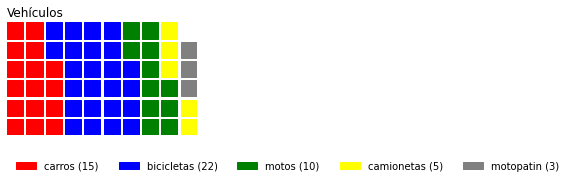

In [12]:
data = {'carros': 15, 'bicicletas': 22, 'motos': 10, 'camionetas': 5, 'motopatin': 3}
fig = plt.figure(
    FigureClass = Waffle,
    rows=6,
    columns=10,
    values=data,
    colors=('red','blue','green','yellow','gray'),
    title=dict(label='Vehículos',loc='left'),
    labels=["{} ({})".format(k, v) for k, v in data.items()],
    legend=dict(loc="lower left", bbox_to_anchor=(0, -0.4), ncol=len(data), framealpha=0)
)

In [15]:
df = tips.groupby(['day'])['size'].sum()
display(
    df,
    df.shape
)

day
Thur    152
Fri      40
Sat     219
Sun     216
Name: size, dtype: int64

(4,)

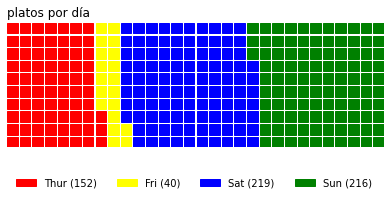

In [18]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=30,
    values=df,
    colors=('red','yellow','blue','green'),
    title=dict(label='platos por día', loc='left'),
    labels=["{} ({})".format(k, v) for k, v in df.items()],
    legend=dict(loc="lower left", bbox_to_anchor=(0, -0.4), ncol=len(df), framealpha=0)
)

In [19]:
df = tips.groupby(['sex'])['tip'].sum().round()
df

sex
Male      485.0
Female    247.0
Name: tip, dtype: float64

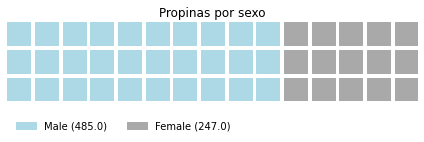

In [20]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=3,
    columns=15,
    values=df,
    colors=('lightblue', 'darkgray'),
    title=dict(label='Propinas por sexo', loc='center'),
    labels=["{} ({})".format(k, v) for k, v in df.items()],
    legend=dict(loc='lower left', bbox_to_anchor=(0, -0.5), ncol=len(df), framealpha=0)
)

## Squarify

In [21]:
import squarify

In [22]:
data = [25,12,10,3,11]
labels = ['futbol', 'natación', 'tenis', 'atletismo', 'pesas']

(0.0, 100.0, 0.0, 100.0)

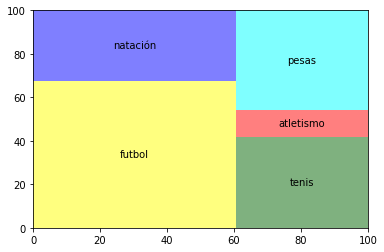

In [29]:
squarify.plot(
    sizes=data,
    label=labels,
    color=['yellow','blue','darkgreen','red','cyan'],
    alpha=0.5
)
plt.axis('on')

In [30]:
df = tips.groupby(['day'])['size'].sum()
df

day
Thur    152
Fri      40
Sat     219
Sun     216
Name: size, dtype: int64

(0.0, 100.0, 0.0, 100.0)

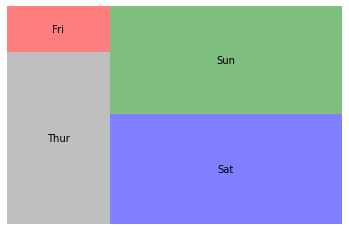

In [32]:
squarify.plot(
    sizes=df,
    label=df.index,
    color=['gray','red','blue','green'],
    alpha=0.5
)
plt.axis('off')

In [33]:
df = tips[(tips['smoker']=='Yes')].groupby(['day'])['smoker'].count()
df

day
Thur    17
Fri     15
Sat     42
Sun     19
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Fumadores por día')

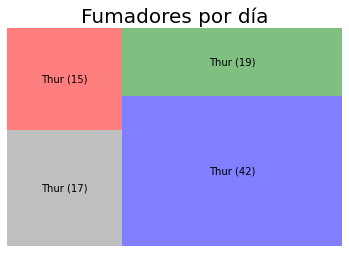

In [37]:
squarify.plot(
    sizes=df,
    label=["{} ({})".format(k, v) for k in df.index for v in df],
    color=['gray','red','blue','green'],
    alpha=0.5
)
plt.axis('off')
plt.title("Fumadores por día", fontsize=20)

## Pandas.dataframe.bar

In [38]:
df = pd.DataFrame(
    data={'valor':[300,200,250,150,180]},
    index=['A','B','C','D','E']
)

In [39]:
df

,valor
A,300
B,200
C,250
D,150
E,180


In [40]:
df['cumsum'] = df.valor.cumsum().shift(1).fillna(0)
df

,valor,cumsum
A,300,0.0
B,200,300.0
C,250,500.0
D,150,750.0
E,180,900.0


<AxesSubplot:>

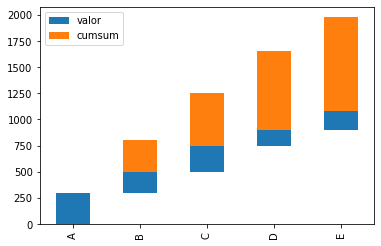

In [41]:
df.plot.bar(
    stacked=True,
    bottom=df['cumsum']
)

<AxesSubplot:>

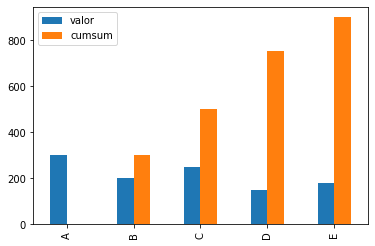

In [42]:
df.plot.bar(
    stacked=False
)

In [43]:
df['total'] = df.valor.sum()
df


,valor,cumsum,total
A,300,0.0,1080
B,200,300.0,1080
C,250,500.0,1080
D,150,750.0,1080
E,180,900.0,1080


<AxesSubplot:>

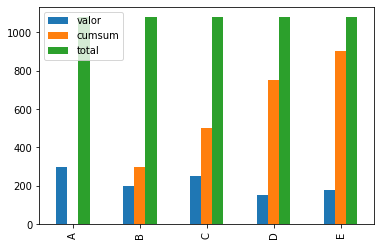

In [44]:
df.plot.bar()

<AxesSubplot:>

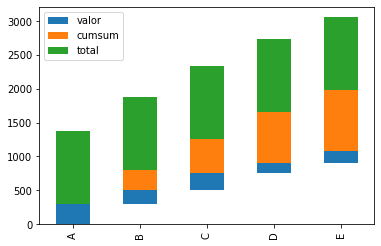

In [47]:
df.plot.bar(
    stacked=True,
    bottom=df['cumsum']
)

In [54]:
df = tips.groupby(['day'])['total_bill','tip','size'].sum()
df.head()

<ipython-input-54-ad814d80345a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = tips.groupby(['day'])['total_bill','tip','size'].sum()


,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


<AxesSubplot:xlabel='day'>

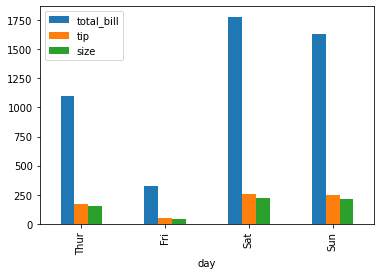

In [55]:
df.plot.bar()

### lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

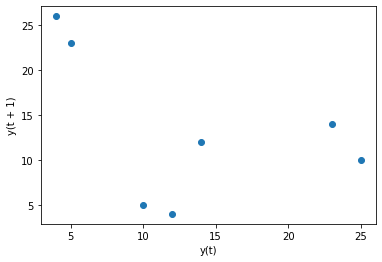

In [57]:
df = pd.DataFrame(
    data={'valores':[25,10,5,23,14,12,4,26]}
)

pd.plotting.lag_plot(df, lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

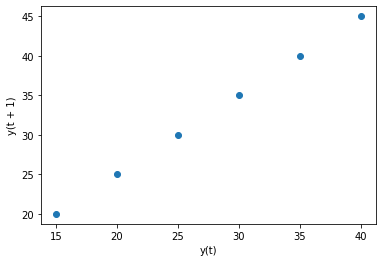

In [58]:
df = pd.DataFrame(
    data={'valores':[15,20,25,30,35,40,45]}
)

pd.plotting.lag_plot(df, lag=1)

### Subplot

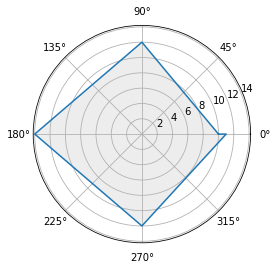

In [68]:
data = {
    'A':[10, 10],
    'B':[12, 25],
    'C':[14, 12],
    'D':[12,10],
    'E':[11,14]
}

df = pd.DataFrame(data)

values = df.iloc[0].tolist()
values.append(values[0])
angles = [a/4 * 2 * np.pi for a in range(5)]
angles.append(angles[0])

plt.subplot(111, polar=True)
plt.plot(angles, values)
plt.fill(angles, values, 'lightgray', alpha=0.4)

### radviz

In [70]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [72]:
mpg.shape

(398, 9)

/home/alejandro/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:147: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=[-1, 1], ylim=[-1, 1])


<AxesSubplot:>

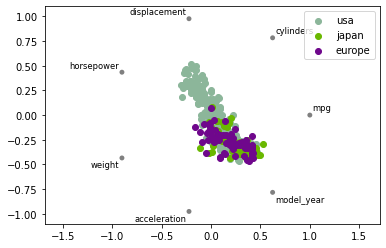

In [74]:
pd.plotting.radviz(mpg.drop(['name'], axis=1), 'origin')

### bootstrap_plot

In [77]:
mpg['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

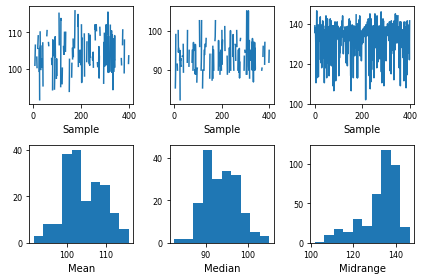

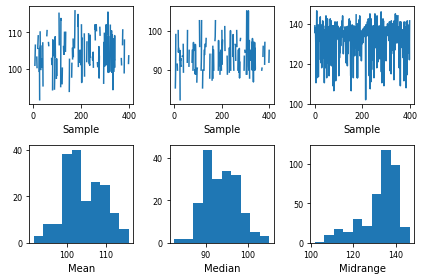

In [79]:
pd.plotting.bootstrap_plot(mpg['horsepower'],size=50,samples=400)

### scatter_matrix

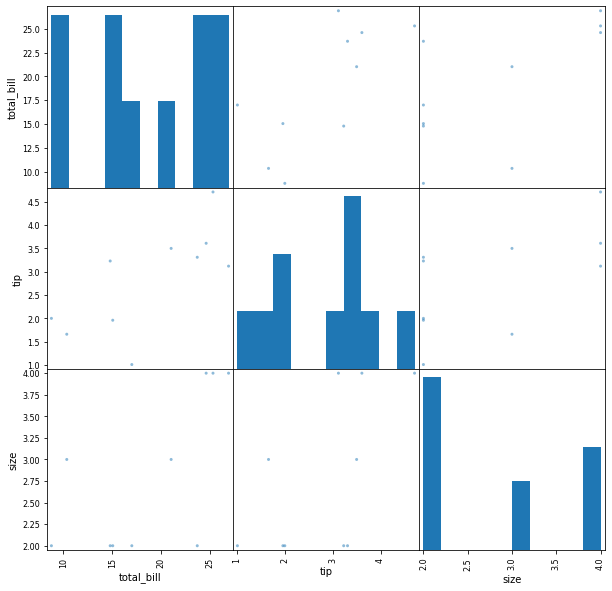

In [81]:
pd.plotting.scatter_matrix(tips[:10], figsize=(10, 10))
plt.show()